In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

Thực hành về hồi qui tuyến tính Linear Regerstion


1. Hàm dự đoán predict

In [3]:
def predict(X, m, b):
  return m*X+b

2. Hàm mất mát

In [4]:
def loss_function(X, y, m, b):
  n = len(X)
  total_error = 0.0
  for i in range(n):
    total_error += (y[i]-(m*X[i]+b))**2
  return total_error/n

3. Viết hàm cập nhật

In [5]:
def update_weights(X, y, m, b, learning_rate):
  m_driv = 0.0
  b_driv = 0.0
  n = len(X)
  for i in range(n):
    m_driv += -2*X[i]*(y[i]-m*X[i]-b)
    b_driv += -2*(y[i]-m*X[i]-b)
  m -= learning_rate*m_driv/n
  b -= learning_rate*b_driv/n
  return m,b

4. Viết hàm Train

In [6]:
def train(X, y, m, b, learning_rate, iters):
  loss_history = []
  for i in range(iters):
    m, b = update_weights(X, y, m, b, learning_rate)
    loss = loss_function(X, y, m, b)
    loss_history.append(loss)
    if i % 10 == 0:
      print(f'iter = {i}, m = {m}, b = {b}, loss = {loss}')
  return m, b, loss_history

5. Tạo dữ liệu và xử lý dữ liệu:
X = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])
X=X/max(X)
y=y/max(y)

In [61]:
X = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
y = np.array([ 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68])
max_y = max(y)
X_sc = X/max(X)
y_sc = y/max(y)

6. Dùng hàm train đã viết để train model

In [62]:
learning_rate = 0.4
iters = 5000
m, b, loss = train(X_sc, y_sc, 0.0, 0.0, learning_rate, iters)

iter = 0, m = 0.6389140271493213, b = 0.697737556561086, loss = 0.16808501182656022
iter = 10, m = 0.4548909665827321, b = 0.4607321137090755, loss = 0.00419780649361424
iter = 20, m = 0.4719509057578831, b = 0.44500719999840394, loss = 0.004063307001841316
iter = 30, m = 0.4888212869577423, b = 0.4296368626198413, loss = 0.003933196955578237
iter = 40, m = 0.50541618142519, b = 0.4145175972870624, loss = 0.0038073021147337904
iter = 50, m = 0.5217400483753604, b = 0.39964525955930613, loss = 0.0036854859183117544
iter = 60, m = 0.5377973142070744, b = 0.38501581659935497, loss = 0.003567616229520709
iter = 70, m = 0.553592333045274, b = 0.3706253014539676, loss = 0.0034535651924356026
iter = 80, m = 0.5691293879034139, b = 0.3564698119581244, loss = 0.0033432090933094823
iter = 90, m = 0.5844126918448461, b = 0.342545509676899, loss = 0.003236428226378423
iter = 100, m = 0.5994463891252432, b = 0.3288486188646192, loss = 0.003133106764013965
iter = 110, m = 0.6142345563163639, b = 0.3

7. Thay đổi hệ số học và số lần lặp quan sát kết quả

In [58]:
learning_rate = 0.2
iters = 10000
m, b, loss = train(X_sc, y_sc, 0.0, 0.0, learning_rate, iters)

iter = 0, m = 0.31945701357466066, b = 0.348868778280543, loss = 0.059551286637359056
iter = 10, m = 0.445242297360028, b = 0.4693403186863439, loss = 0.004273670953094369
iter = 20, m = 0.45392789826731367, b = 0.4614275076941948, loss = 0.004204672839557407
iter = 30, m = 0.4625420824992647, b = 0.4535793025156732, loss = 0.004136801142155972
iter = 40, m = 0.47108566275210045, b = 0.4457954231620807, loss = 0.004070037471583658
iter = 50, m = 0.47955921771389354, b = 0.43807534240357904, loss = 0.004004363738953621
iter = 60, m = 0.4879633213292012, b = 0.4304185373311467, loss = 0.003939762150685787
iter = 70, m = 0.4962985428383896, b = 0.4228244893216537, loss = 0.0038762152036858947
iter = 80, m = 0.5045654468161903, b = 0.4152926840027329, loss = 0.0038137056806031894
iter = 90, m = 0.5127645932099413, b = 0.4078226112179402, loss = 0.003752216645165599
iter = 100, m = 0.5208965373775141, b = 0.40041376499219933, loss = 0.0036917314375910183
iter = 110, m = 0.5289618301249298, 



8. Vẽ biểu đồ biểu thị sự thay đổi hàm mất mát

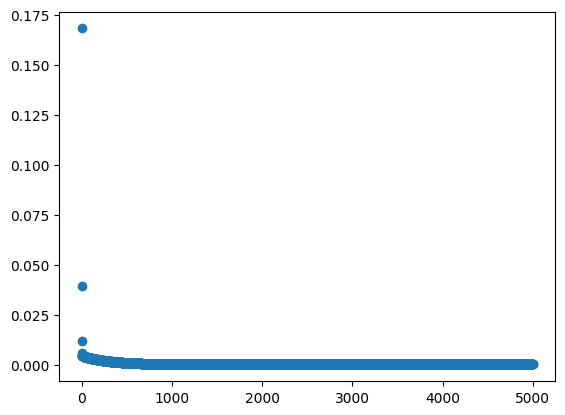

In [63]:
plt.scatter(range(len(loss)), loss);

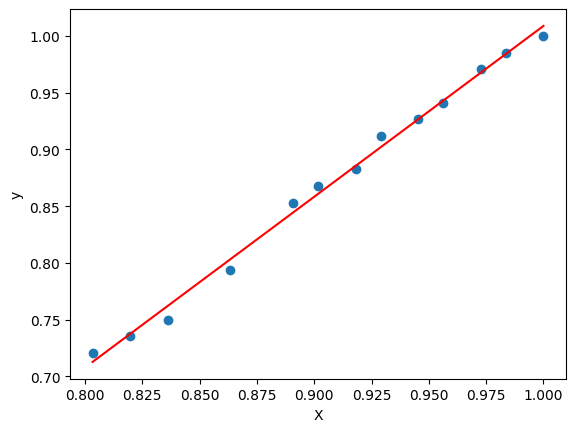

In [65]:
plt.scatter(X_sc, y_sc)
plt.plot(X_sc, predict(X_sc, m, b), c='r');
plt.xlabel('X');
plt.ylabel('y');

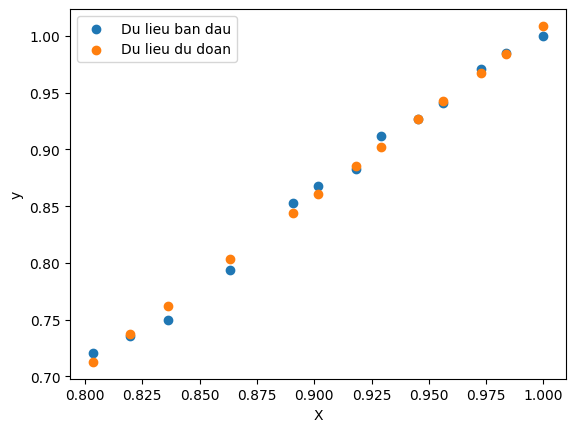

In [71]:
y_pred = []
n = len(X)
for i in range(n):
  y_pred.append(predict(X_sc[i], m, b))
plt.scatter(X_sc, y_sc, label='Du lieu ban dau');
plt.scatter(X_sc, y_pred, label='Du lieu du doan');
plt.xlabel('X');
plt.ylabel('y');
plt.legend();

9. In kết quả dự đoán và kết quả thật để so sánh

In [72]:
y_pred = np.array(y_pred)*max_y
res = pd.DataFrame({'y':y, 'y_pred':y_pred})
res

,y,y_pred
0,49,48.469801
1,50,50.147100
2,51,51.824398
3,54,54.619895
4,58,57.415392
5,59,58.533591
6,60,60.210889
7,62,61.329088
8,63,63.006386
9,64,64.124585


10. Đọc dữ liệu từ file Cannang. Thực hiện train và test.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
path = '/content/drive/MyDrive/DS 321 - Machine Learning 1/resources/CanNang.csv'
df = pd.read_csv(path, names=['Chieu cao', 'Can nang'])
df

,Chieu cao,Can nang
0,140.0,35.0
1,142.0,40.0
2,150.0,45.0
3,152.0,48.0
4,158.0,55.0
5,160.0,56.0
6,163.0,58.0
7,165.0,62.0
8,173.0,65.0
9,175.0,68.0


In [73]:
X = df['Chieu cao'].values
y = df['Can nang'].values
max_y = max(y)
X_sc = X/max(X)
y_sc = y/max(y)

In [74]:
learning_rate = 0.4
iters = 5000
m, b, loss = train(X_sc, y_sc, 0.0, 0.0, learning_rate, iters)

iter = 0, m = 0.5044149504195271, b = 0.561159420289855, loss = 0.11587587566612957
iter = 10, m = 0.4183485679438998, b = 0.3414936993225275, loss = 0.027140626479456795
iter = 20, m = 0.47692403221771723, b = 0.2899320172378723, loss = 0.025620391736602473
iter = 30, m = 0.5337716696644599, b = 0.23993622120170813, loss = 0.02418964455976279
iter = 40, m = 0.5889208263797262, b = 0.1914341951903412, loss = 0.022843115427325485
iter = 50, m = 0.6424222457935624, b = 0.1443813046195655, loss = 0.021575847014112602
iter = 60, m = 0.694325158725566, b = 0.09873425246187129, loss = 0.02038317379788581
iter = 70, m = 0.7446773250856693, b = 0.054451035311735084, loss = 0.01926070488295532
iter = 80, m = 0.7935250778211851, b = 0.01149090473437479, loss = 0.01820430783484243
iter = 90, m = 0.8409133655513576, b = -0.03018567023005679, loss = 0.017210093466482227
iter = 100, m = 0.8868857939280859, b = -0.07061703944198447, loss = 0.01627440151995545
iter = 110, m = 0.9314846657608771, b = -

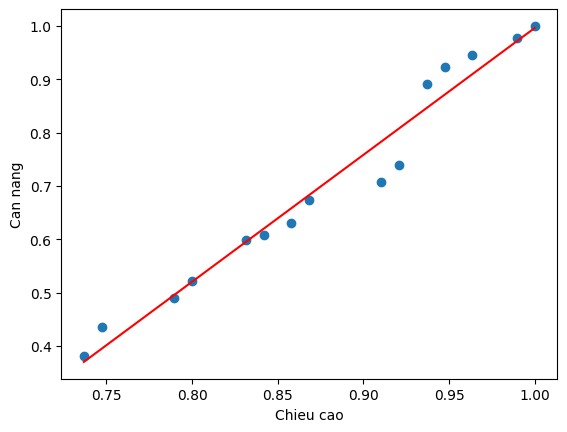

In [75]:
plt.scatter(X_sc, y_sc)
plt.plot(X_sc, predict(X_sc, m, b), c='r');
plt.xlabel('Chieu cao');
plt.ylabel('Can nang');

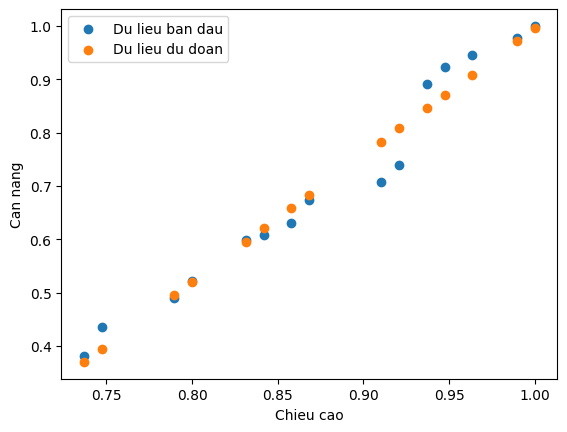

In [76]:
y_pred = []
n = len(X)
for i in range(n):
  y_pred.append(predict(X_sc[i], m, b))
plt.scatter(X_sc, y_sc, label='Du lieu ban dau');
plt.scatter(X_sc, y_pred, label='Du lieu du doan');
plt.xlabel('Chieu cao');
plt.ylabel('Can nang');
plt.legend();

In [77]:
y_pred = np.array(y_pred)*max_y
res = pd.DataFrame({'Can nang ban dau':y, 'Can nang du doan':y_pred})
res

,Can nang ban dau,Can nang du doan
0,35.0,34.037806
1,40.0,36.342254
2,45.0,45.560045
3,48.0,47.864493
4,55.0,54.777837
5,56.0,57.082285
6,58.0,60.538957
7,62.0,62.843405
8,65.0,72.061197
9,68.0,74.365645
